In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm

In [2]:
file_path = '../data_raw/'
file_list = os.listdir(file_path)
output_path = '../map/data/usa_top10.csv'

In [3]:
df_temp = pd.read_csv(file_path  + file_list[0], error_bad_lines='skip')

In [19]:
all_data = pd.DataFrame()
for file in tqdm(file_list):
    if ".txt" not in file and "Dryad" not in file:
        df_temp = pd.read_csv(file_path  + file, error_bad_lines='skip')
        value_counts = df_temp["scientific_name"].value_counts()
        df_counts = pd.DataFrame(value_counts).transpose().reset_index(drop=True)
        state_name = file.split('_')[0]
        df_counts["city"] = state_name
        df_counts["state"] = df_temp["state"][0]
        all_data = pd.concat([all_data, df_counts], ignore_index=True)
#all_data = all_data.drop(columns = ["ok to plant vacant"])

In [20]:
states_data = all_data.groupby('state').sum().reset_index()

In [31]:
all_data[all_data['state']=="Arizona"]['city']

33    Phoenix
Name: city, dtype: object

In [23]:
abundant_trees = states_data.drop(columns=["state"]).sum().nlargest(10).index

In [24]:
states_data.drop(columns=["state"]).sum().nlargest(10)

Platanus acerifolia        217762.0
Lagerstroemia indica       207061.0
Acer platanoides           198951.0
Gleditsia triacanthos      167242.0
Pyrus calleryana           159981.0
Fraxinus pennsylvanica     156922.0
Acer rubrum                140917.0
Liquidambar styraciflua    111483.0
Tilia cordata              106723.0
Quercus virginiana         104183.0
dtype: float64

In [25]:
abundant_trees.to_list()

['Platanus acerifolia',
 'Lagerstroemia indica',
 'Acer platanoides',
 'Gleditsia triacanthos',
 'Pyrus calleryana',
 'Fraxinus pennsylvanica',
 'Acer rubrum',
 'Liquidambar styraciflua',
 'Tilia cordata',
 'Quercus virginiana']

In [26]:
other_trees = states_data.drop(columns=["state"] + abundant_trees.to_list()).sum(axis = 1) 

In [27]:
new_table = pd.DataFrame(states_data[["state"] + abundant_trees.to_list()])

In [28]:
new_table['other'] = other_trees

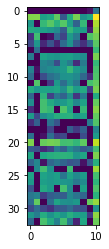

In [29]:
plt.imshow(np.log(1 + new_table.values[:,1:].astype("float")))

In [30]:
new_table

,state,Platanus acerifolia,Lagerstroemia indica,Acer platanoides,Gleditsia triacanthos,Pyrus calleryana,Fraxinus pennsylvanica,Acer rubrum,Liquidambar styraciflua,Tilia cordata,Quercus virginiana,other
0,Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,213.0
1,California,96084.0,101245.0,3081.0,5560.0,45226.0,53.0,6164.0,77900.0,1387.0,4090.0,1423470.0
2,Colorado,1825.0,0.0,13185.0,35165.0,8646.0,33045.0,3256.0,84.0,13440.0,0.0,246232.0
3,District of Columbia,5745.0,4325.0,3403.0,1911.0,953.0,55.0,12711.0,2839.0,2705.0,2.0,133356.0
4,Florida,7.0,18398.0,0.0,1.0,115.0,18.0,2262.0,336.0,0.0,28555.0,72202.0
5,Georgia,21.0,1728.0,4.0,38.0,3.0,143.0,1476.0,48.0,6.0,104.0,37679.0
6,Hawaii,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14978.0
7,Indiana,325.0,0.0,3298.0,1931.0,1420.0,2810.0,3135.0,1478.0,1000.0,0.0,81830.0
8,Iowa,0.0,0.0,712.0,405.0,28.0,1558.0,395.0,5.0,327.0,0.0,12375.0
9,Kansas,492.0,1.0,563.0,964.0,1357.0,1929.0,13289.0,1983.0,900.0,0.0,23289.0


In [ ]:
new_table.to_csv(output_path,index=False)